## SMS Spam Classifier

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

### Steps to be followed:

- `Data cleaning`

- `EDA(Exploratory Data Analysis)`

- `Text pre-processing`

- `Model building`

- `Evaluation`

- `Improvement`

- `Website Conversion`

- `Deployment`

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'label': 'target', 'message': 'text'}, inplace=True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# Duplicate values
df.duplicated().sum()

403

In [13]:
# Remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

### EDA

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

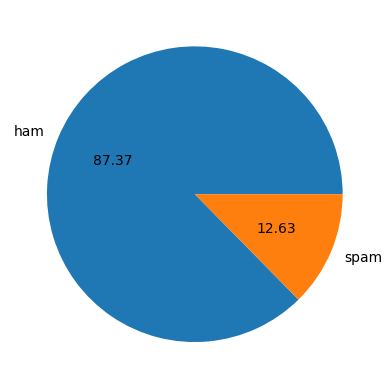

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Ham messages
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Spam messages
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


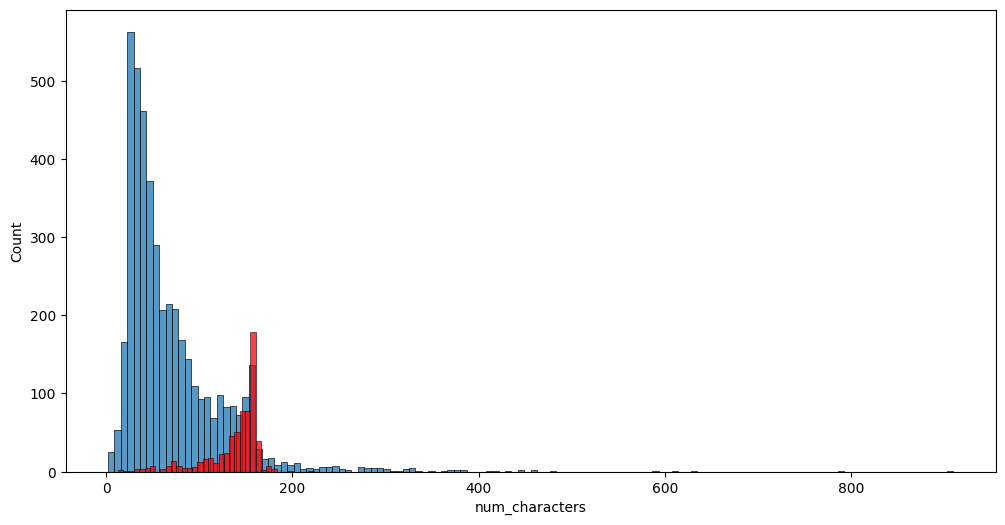

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
plt.show()

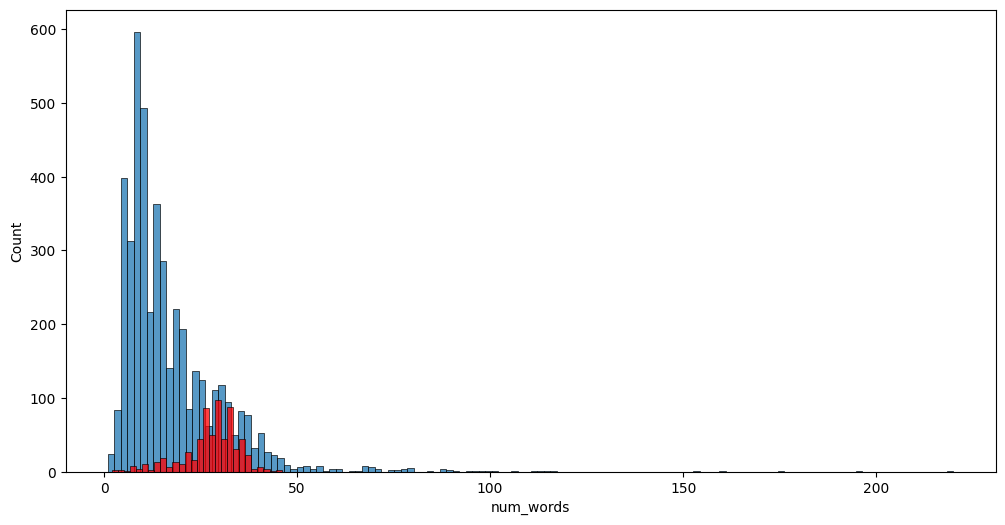

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')
plt.show()

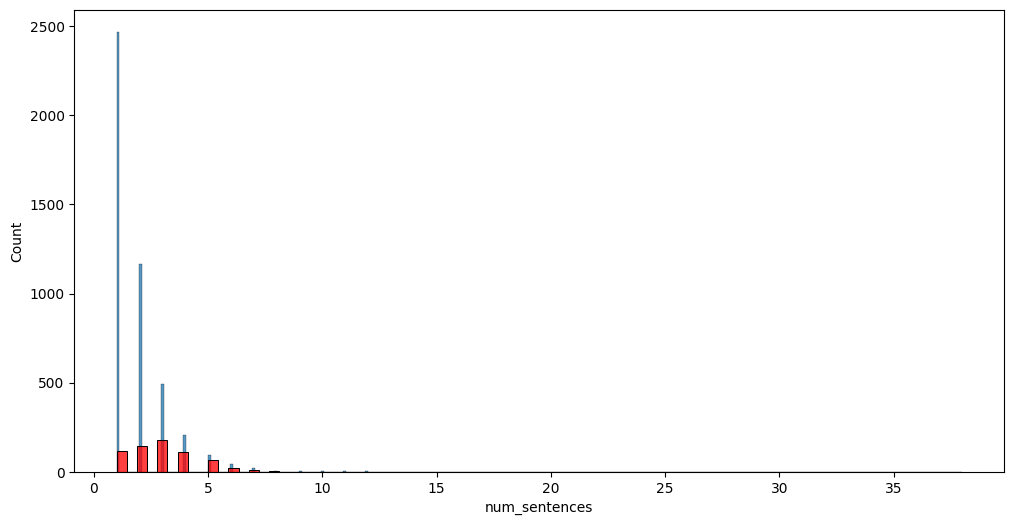

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')
plt.show()

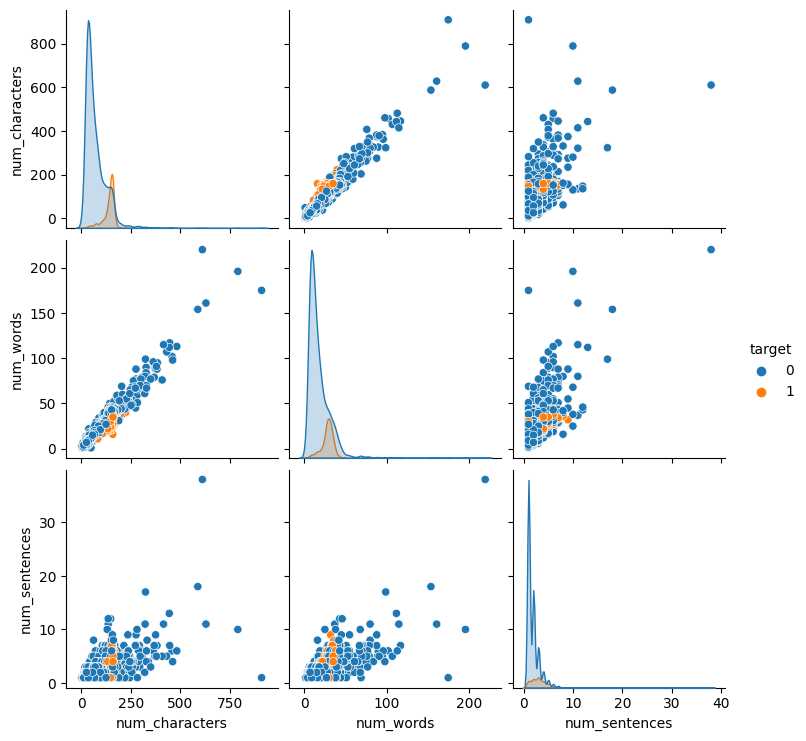

In [33]:
sns.pairplot(df, hue='target')

In [34]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.379791,0.260168,0.263826
num_characters,0.379791,1.000000,0.966003,0.622580
num_words,0.260168,0.966003,1.000000,0.679142
num_sentences,0.263826,0.622580,0.679142,1.000000


<Axes: >

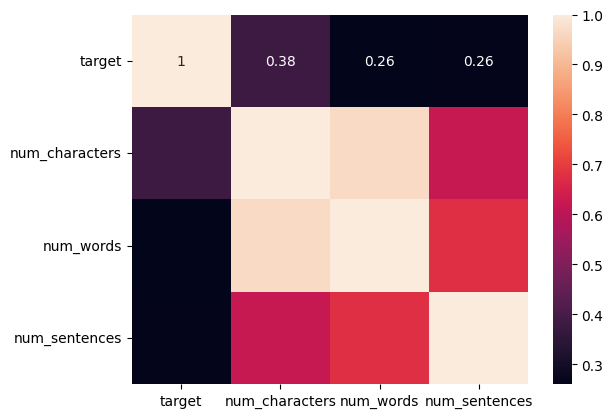

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Text Pre-Processing

- `Lowercase`

- `Tokenization`

- `Removing special characters`

- `Removing stop words and punctuation`

- `Stemming`

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import string

def transform_text(text):
    # Converting text to lower case
    text=text.lower()
    # Tokenizing text to words
    text=nltk.word_tokenize(text)
    
    # Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    # Removing stop words and punctuations
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    # Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [38]:
print(transform_text(df['text'][0]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [39]:
df['transformed_text']=df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
# Preparing word clouds
from wordcloud import WordCloud
wc=WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'
)

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

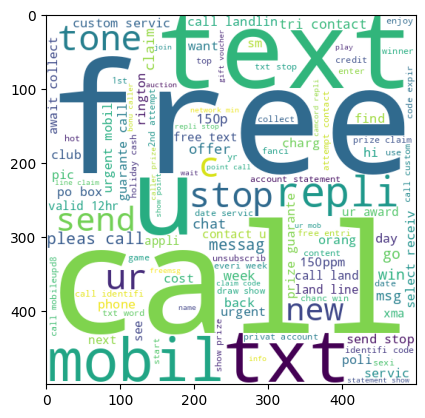

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

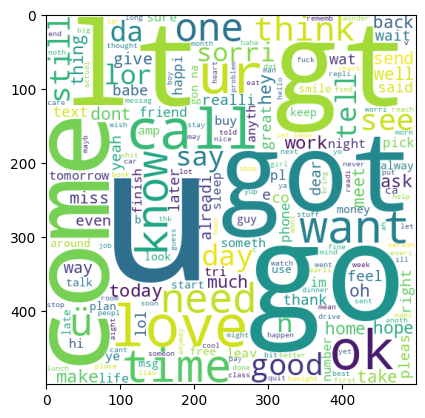

In [45]:
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9982

In [48]:
from collections import Counter
spam_corpus_dict_freq=dict(Counter(spam_corpus).most_common(30))
print(spam_corpus_dict_freq)

{'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 120, 'ur': 119, 'mobil': 114, 'stop': 108, 'repli': 103, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 61, 'urgent': 58, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 48, 'c': 45, 'collect': 45, 'min': 45}


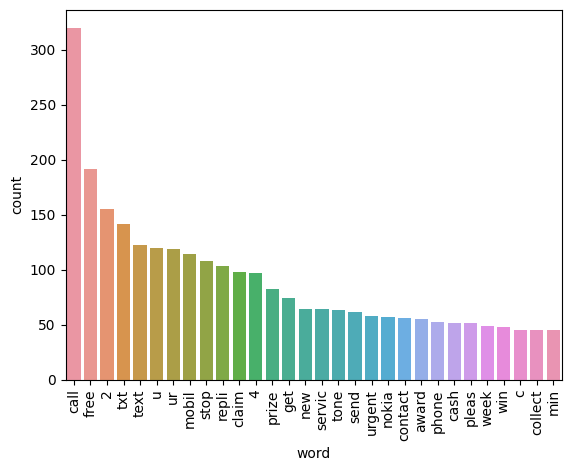

In [49]:
spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_df.columns=['word', 'count']

sns.barplot(
    x='word',
    y='count',
    data=spam_df
)

plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
ham_corpus_dict_freq=dict(Counter(ham_corpus).most_common(30))
print(ham_corpus_dict_freq)

{'u': 897, 'go': 407, 'get': 351, '2': 288, 'gt': 288, 'lt': 287, 'come': 278, 'got': 239, 'know': 237, 'like': 236, 'call': 235, 'love': 222, 'time': 220, 'ok': 218, 'good': 215, 'want': 209, 'ur': 203, 'day': 195, 'ü': 173, 'need': 171, 'one': 166, '4': 162, 'lor': 159, 'home': 152, 'think': 150, 'see': 148, 'take': 144, 'still': 144, 'da': 142, 'tell': 133}


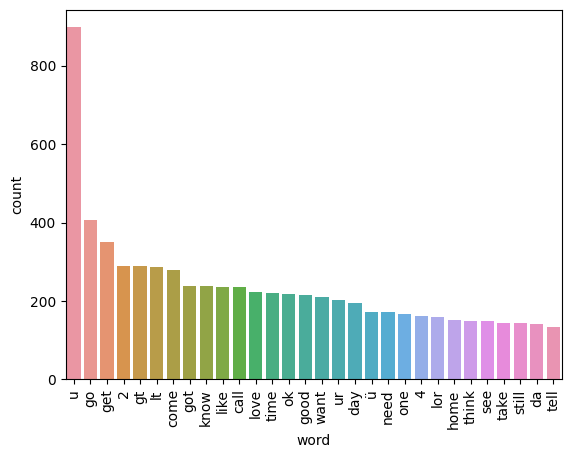

In [52]:
ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_df.columns=['word', 'count']

sns.barplot(
    x='word',
    y='count',
    data=ham_df
)

plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [53]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()

In [54]:
# x=cv.fit_transform(df['transformed_text']).toarray()
# y=df['target'].values

In [55]:
# print(x.shape)

In [56]:
# print(y.shape)

In [57]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test=train_test_split(
#     x, y,
#     test_size=0.2,
#     random_state=2
# )

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
# gnb.fit(x_train, y_train)
# y_pred_gnb=gnb.predict(x_test)

# print(accuracy_score(y_test, y_pred_gnb))
# print(confusion_matrix(y_test, y_pred_gnb))
# print(precision_score(y_test, y_pred_gnb))

In [61]:
# mnb.fit(x_train, y_train)
# y_pred_mnb=mnb.predict(x_test)

# print(accuracy_score(y_test, y_pred_mnb))
# print(confusion_matrix(y_test, y_pred_mnb))
# print(precision_score(y_test, y_pred_mnb))

In [62]:
# bnb.fit(x_train, y_train)
# y_pred_bnb=bnb.predict(x_test)

# print(accuracy_score(y_test, y_pred_bnb))
# print(confusion_matrix(y_test, y_pred_bnb))
# print(precision_score(y_test, y_pred_bnb))

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [64]:
x_tfidf=tfidf.fit_transform(df['transformed_text']).toarray()
y_tfidf=df['target'].values

In [65]:
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test=train_test_split(
    x_tfidf, y_tfidf,
    test_size=0.2,
    random_state=2
)

In [66]:
gnb.fit(x_tfidf_train, y_tfidf_train)
y_pred_gnb=gnb.predict(x_tfidf_test)

print(accuracy_score(y_tfidf_test, y_pred_gnb))
print(confusion_matrix(y_tfidf_test, y_pred_gnb))
print(precision_score(y_tfidf_test, y_pred_gnb))

0.8684719535783365
[[794 114]
 [ 22 104]]
0.47706422018348627


In [67]:
mnb.fit(x_tfidf_train, y_tfidf_train)
y_pred_mnb=mnb.predict(x_tfidf_test)

print(accuracy_score(y_tfidf_test, y_pred_mnb))
print(confusion_matrix(y_tfidf_test, y_pred_mnb))
print(precision_score(y_tfidf_test, y_pred_mnb))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [68]:
bnb.fit(x_tfidf_train, y_tfidf_train)
y_pred_bnb=bnb.predict(x_tfidf_test)

print(accuracy_score(y_tfidf_test, y_pred_bnb))
print(confusion_matrix(y_tfidf_test, y_pred_bnb))
print(precision_score(y_tfidf_test, y_pred_bnb))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95


- `Vecotorizer`: tfidf

- `Bayesian model`: mnb

In [69]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [70]:
# svc=SVC(kernel='sigmoid', gamma=1.0)
# knc=KNeighborsClassifier()
# mnb=MultinomialNB()
# dtc=DecisionTreeClassifier(max_depth=5)
# lrc=LogisticRegression(solver='liblinear', penalty='l1')
# rfc=RandomForestClassifier(n_estimators=50, random_state=2)
# adc=AdaBoostClassifier(n_estimators=50, random_state=2)
# bgc=BaggingClassifier(n_estimators=50, random_state=2)
# etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb=XGBClassifier(n_estimators=50, random_state=2)

In [71]:
# clfs={
#     'SVC': svc,
#     'KNC': knc,
#     'MNB': mnb,
#     'DTC': dtc,
#     'LRC': lrc,
#     'RFC': rfc,
#     'ADC': adc,
#     'BGC': bgc,
#     'ETC': etc,
#     'GBC': gbc,
#     'XGB': xgb
# }

In [72]:
# def train_classifier(clf, x_train, y_train, x_test, y_test):
#     clf.fit(x_train, y_train)
#     y_pred=clf.predict(x_test)
    
#     accuracy=accuracy_score(y_test, y_pred)
#     precision=precision_score(y_test, y_pred)
#     return accuracy, precision

In [73]:
# train_classifier(svc, x_tfidf_train, y_tfidf_train, x_tfidf_test, y_tfidf_test)

In [74]:
# acc_scores=[]
# prec_scores=[]

# for name, clf in clfs.items():
#     curr_acc, curr_prec=train_classifier(
#         clf,
#         x_tfidf_train, y_tfidf_train,
#         x_tfidf_test, y_tfidf_test
#     )

#     print(f'For {name} accuracy is {curr_acc} and precision is {curr_prec}')
#     acc_scores.append(curr_acc)
#     prec_scores.append(curr_prec)

In [75]:
# performance_df=pd.DataFrame({
#     'Algorithm': clfs.keys(),
#     'Accuracy': acc_scores,
#     'Precision': prec_scores
# })

In [76]:
# performance_df.sort_values(by='Accuracy', ascending=False)

In [77]:
# performance_df.sort_values(by='Precision', ascending=False)

In [78]:
# sns.catplot(
#     x='Algorithm',
#     y='value',
#     hue='variable',
#     data=performance_df.melt(id_vars='Algorithm'),
#     kind='bar',
#     height=5
# )

# plt.ylim(0.5, 1.0)
# plt.xticks(rotation='vertical')
# plt.show()

### Improving Model

#### Updating `max_features` in TfidfVectorizer

In [79]:
# tfidf=TfidfVectorizer(max_features=3000)

In [80]:
# x=tfidf.fit_transform(df['transformed_text']).toarray()

#### Applying `min_max_scaling` on x

In [81]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)

#### Appending `num_character` column to x

In [82]:
# x=np.hstack((x, df['num_characters'].values.reshape(-1, 1)))

### Voting Classifier

In [83]:
# from sklearn.ensemble import VotingClassifier

# svc=SVC(kernel='sigmoid', gamma=1.0, probability=True)
# mnb=MultinomialNB()
# etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

In [84]:
# voting=VotingClassifier(
#     estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)],
#     voting='soft'
# )

In [85]:
# voting.fit(x_tfidf_train, y_tfidf_train)

In [86]:
# y_pred=voting.predict(x_tfidf_test)
# print(accuracy_score(y_tfidf_test, y_pred))
# print(precision_score(y_tfidf_test, y_pred))

### Stacking Classifier

In [87]:
# final_estimator=RandomForestClassifier()
# estimators=[('svc', svc), ('mnb', mnb), ('etc', etc)]

In [88]:
# from sklearn.ensemble import StackingClassifier
# clf=StackingClassifier(
#     estimators=estimators,
#     final_estimator=final_estimator
# )

In [89]:
# clf.fit(x_tfidf_train, y_tfidf_train)
# y_pred=clf.predict(x_tfidf_test)

# print(accuracy_score(y_tfidf_test, y_pred))
# print(precision_score(y_tfidf_test, y_pred))

In [90]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))